In [1]:
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

In [2]:
import warnings
import json
warnings.filterwarnings("ignore")

In [3]:
#!pip install xgboost lightgbm catboost

In [24]:
file = "./Data/clean_regional_data.csv"
df = pd.read_csv(file)

In [6]:
drop_cols = ["Year"]
df = df.drop(columns=drop_cols)

In [7]:
label_encoders = {}
categorical_cols = ["Country"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
def results(target):
    print(f"Predicting {target}...")
    
    # Define features
    X = df.drop(columns=[target])
    y = df[target]

    # Handle missing values using imputation
    imputer = SimpleImputer(strategy="mean")
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        "Linear Regression": LinearRegression(),
        "SVR": SVR(kernel='rbf'),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
        "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
        "CatBoost": CatBoostRegressor(verbose=0)
    }

    # Standardize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate models
    results = {}
    data = []
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[name] = rmse
        data.append({f"Model": name, "RMSE": f"{rmse:.2f}"})
        #print(f"{name} RMSE: {rmse:.2f}")
    print(json.dumps(data, indent=4))
    # Print best model
    best_model = min(results, key=results.get)
    print(f"Best model for {target}: {best_model} with RMSE {results[best_model]:.2f}\n")
    
    plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

    ax = sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis") # Use a visually appealing palette

    plt.xticks(rotation=45, ha="right", fontsize=10) # Rotate x-axis labels, align to the right, and adjust font size
    plt.xlabel("Model", fontsize=12) # Add x-axis label with larger font size
    plt.ylabel("RMSE", fontsize=12) # Add y-axis label with larger font size
    plt.title(f"Model Performance for {target}", fontsize=14, fontweight="bold") # Larger and bolder title

    # Improve bar appearance
    for bar in ax.patches:
        bar.set_edgecolor('black')  # Add black edges to bars for better definition
        bar.set_linewidth(1) # Adjust line width

    # Add value labels on top of bars (optional, but often helpful)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.02, f'{height:.2f}', ha="center", fontsize=10) # Adjust vertical offset (0.02) as needed

    # Improve plot aesthetics
    sns.despine(left=True) # Remove left (and optionally bottom) spines for a cleaner look
    plt.tight_layout() # Adjust layout to prevent labels from overlapping

    # Optional: Format y-axis if RMSE values are very small or large
    # Example for very small values:
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))  # Format y-axis to 3 decimal places

    # Example for very large values (e.g., thousands):
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'K')) # Format in thousands with "K"

    plt.show()


    # Generate dynamic paragraphs
    print(f"The best model for predicting {target} is {best_model} with an RMSE of {results[best_model]:.2f}.\n")

Predicting Investment in energy with private participation (current US$)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7943
[LightGBM] [Info] Number of data points in the train set: 806, number of used features: 32
[LightGBM] [Info] Start training from score 7264332679.543425
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

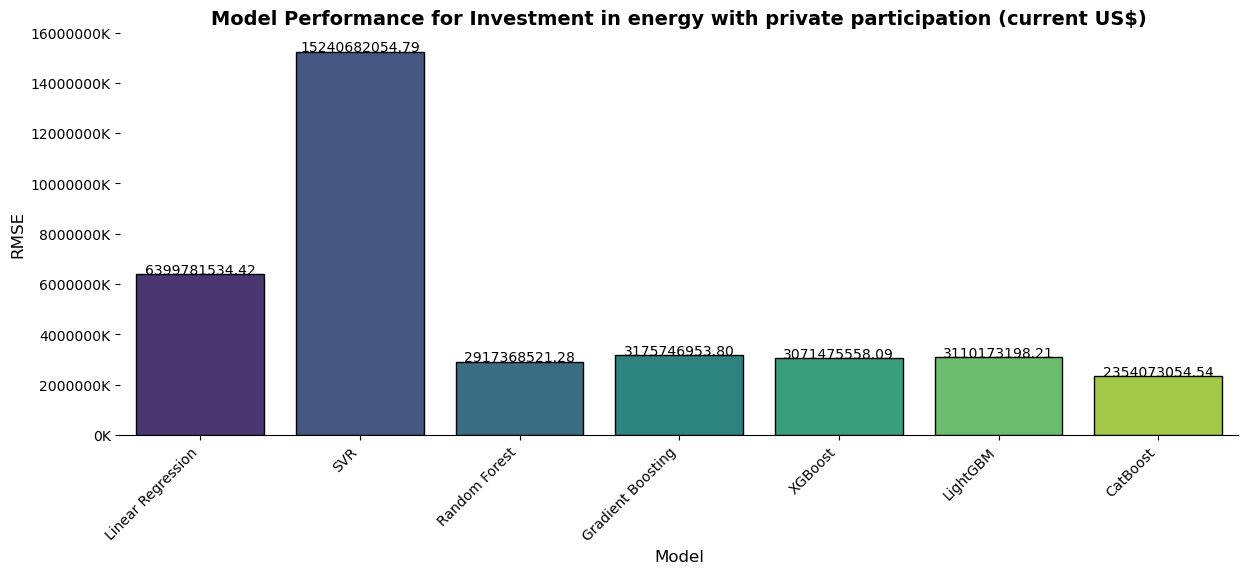

The best model for predicting Investment in energy with private participation (current US$) is CatBoost with an RMSE of 2354073054.54.



In [9]:
target = "Investment in energy with private participation (current US$)"
results(target)

Predicting Public private partnerships investment in energy (current US$)...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7808
[LightGBM] [Info] Number of data points in the train set: 806, number of used features: 32
[LightGBM] [Info] Start training from score 11419456299.235731
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

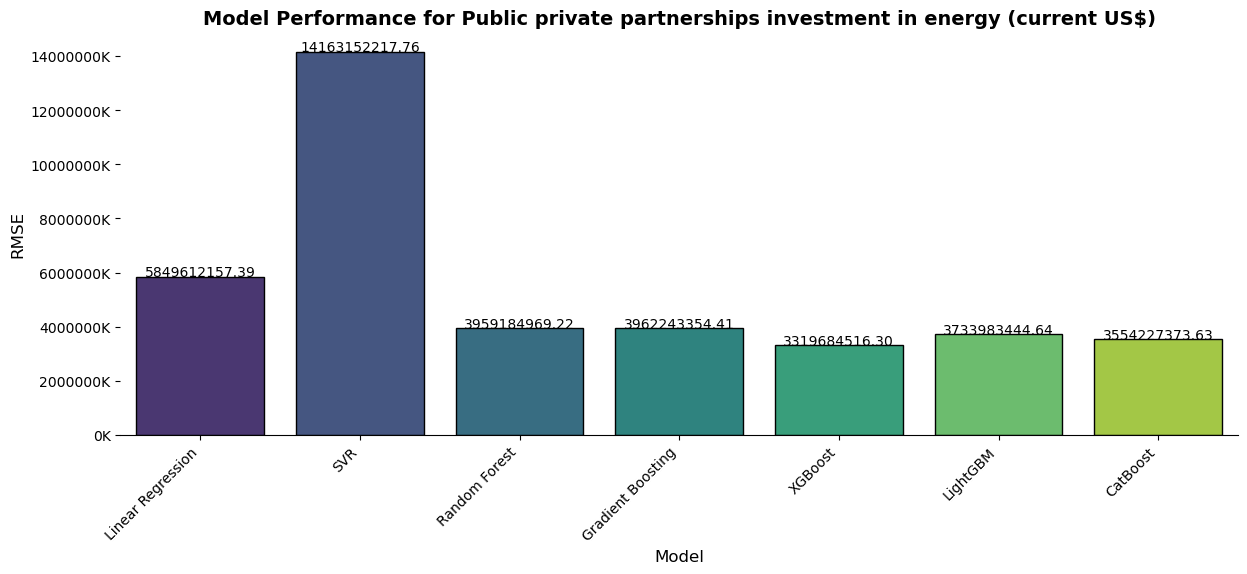

The best model for predicting Public private partnerships investment in energy (current US$) is XGBoost with an RMSE of 3319684516.30.



In [10]:
target = "Public private partnerships investment in energy (current US$)"
results(target)

In [11]:
target_categorical = "Country"
print(f"Predicting {target_categorical}...")

Predicting Country...


In [12]:
X_cat = df.drop(columns=[target_categorical])
y_cat = df[target_categorical]

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)

# Use Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cat, y_train_cat)
y_pred_cat = clf.predict(X_test_cat)

In [13]:
accuracy = accuracy_score(y_test_cat, y_pred_cat)
print(f"Accuracy for {target_categorical}: {accuracy:.2f}")

Accuracy for Country: 0.85


In [14]:
feature_importances = pd.Series(clf.feature_importances_, index=X_cat.columns).sort_values(ascending=False)

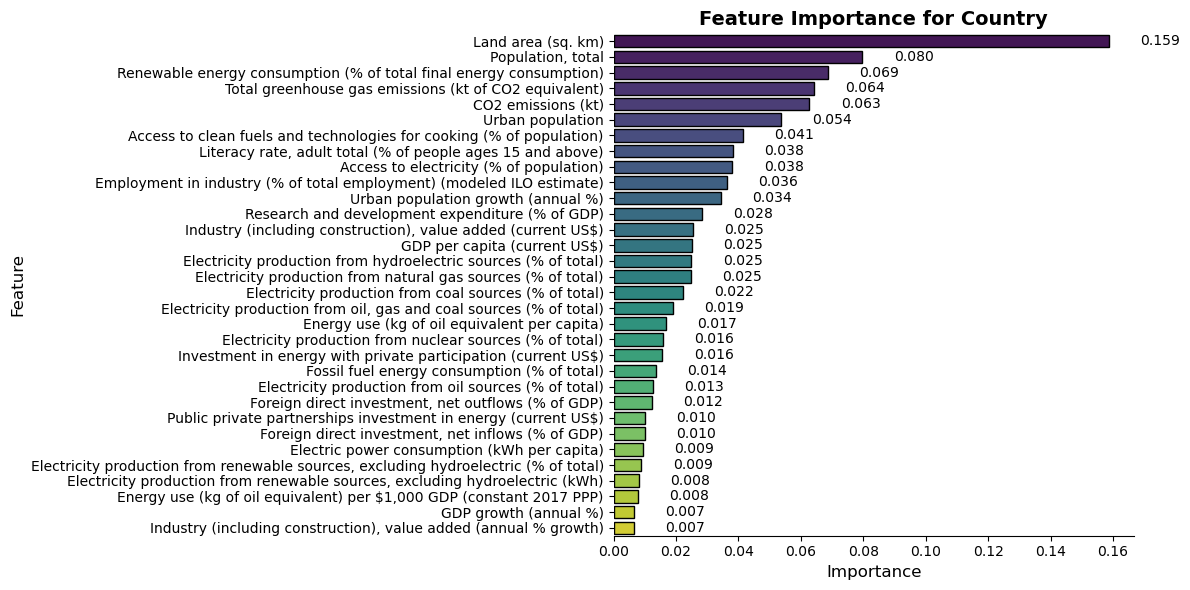

In [15]:
plt.figure(figsize=(12, 6))  # Adjust figure size

ax = sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")  # Use a color palette

plt.title(f"Feature Importance for {target_categorical}", fontsize=14, fontweight="bold")  # Larger, bolder title
plt.xlabel("Importance", fontsize=12)  # X-axis label
plt.ylabel("Feature", fontsize=12)  # Y-axis label

# Improve bar appearance
for bar in ax.patches:
    bar.set_edgecolor('black')  # Add black edges to bars
    bar.set_linewidth(1)

# Add importance values next to the bars (optional, but often helpful)
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.01,  # Slightly to the right of the bar
             p.get_y() + p.get_height() / 2,  # Centered vertically
             f'{width:.3f}',  # Format the importance value
             va='center',  # Vertical alignment
             fontsize=10) #Font size

sns.despine(left=True)  # Remove left spine
plt.tight_layout()  # Adjust layout

# Optional: Limit the number of features displayed if there are many
num_features_to_show = len(feature_importances)  # Show top 20 features
plt.yticks(range(min(num_features_to_show, len(feature_importances))), feature_importances.index[:num_features_to_show]) # Adjust y-ticks
plt.tight_layout() # Adjust layout again after changing ticks.

plt.show()

In [16]:
print(f"The model predicts {target_categorical} with an accuracy of {accuracy:.2f}.")

The model predicts Country with an accuracy of 0.85.


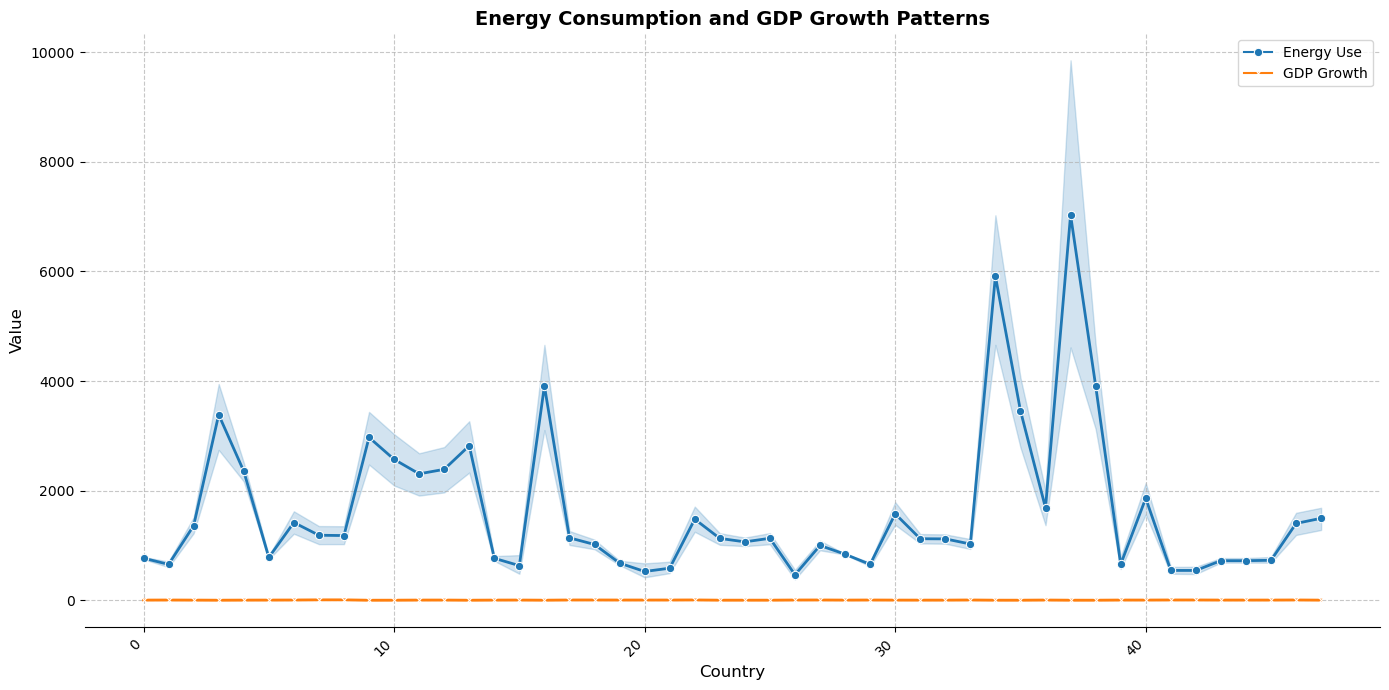

In [17]:
plt.figure(figsize=(14, 7))  # Slightly wider figure

ax = sns.lineplot(data=df, x='Country', y='Energy use (kg of oil equivalent per capita)', label='Energy Use', marker='o', markersize=6) #Added markers
sns.lineplot(data=df, x='Country', y='GDP growth (annual %)', label='GDP Growth', marker='x', markersize=6) #Added markers

plt.xticks(rotation=45, ha='right', fontsize=10)  # Improved rotation and alignment
plt.xlabel("Country", fontsize=12)  # Added x-axis label
plt.ylabel("Value", fontsize=12)  # More general y-axis label
plt.title("Energy Consumption and GDP Growth Patterns", fontsize=14, fontweight='bold')  # Larger, bolder title

# Customize the legend
plt.legend(fontsize=10, loc="upper right")  # Added legend font size and location

# Improve gridlines
plt.grid(True, linestyle='--', alpha=0.7)  # Added a grid

# Improve the look of the lines
ax.lines[0].set_linewidth(2) # Set line width
ax.lines[1].set_linewidth(2) # Set line width

sns.despine(left=True)  # Remove left spine

plt.tight_layout()  # Adjust layout

plt.show()

In [18]:
# 1. Calculate key values for the paragraph:
energy_max = df['Energy use (kg of oil equivalent per capita)'].max()
energy_min = df['Energy use (kg of oil equivalent per capita)'].min()
gdp_max = df['GDP growth (annual %)'].max()
gdp_min = df['GDP growth (annual %)'].min()

energy_max_country = df.loc[df['Energy use (kg of oil equivalent per capita)'] == energy_max, 'Country'].iloc[0] # Get country with max energy use
energy_min_country = df.loc[df['Energy use (kg of oil equivalent per capita)'] == energy_min, 'Country'].iloc[0]  # Get country with min energy use
gdp_max_country = df.loc[df['GDP growth (annual %)'] == gdp_max, 'Country'].iloc[0] # Get country with max GDP growth
gdp_min_country = df.loc[df['GDP growth (annual %)'] == gdp_min, 'Country'].iloc[0]  # Get country with min GDP growth

# Calculate correlation (if needed) - requires numerical data for both columns.
try:
    correlation = df['Energy use (kg of oil equivalent per capita)'].corr(df['GDP growth (annual %)'])
except TypeError:
    correlation = "Correlation could not be calculated. Check data types."

# 2. Generate the dynamic paragraph:
paragraph = f"This visualization explores the relationship between energy consumption (kg of oil equivalent per capita) and GDP growth (annual %) across different countries.  Energy consumption ranges from a minimum of {energy_min:.2f} in {energy_min_country} to a maximum of {energy_max:.2f} in {energy_max_country}.  GDP growth varies from {gdp_min:.2f}% in {gdp_min_country} to {gdp_max:.2f}% in {gdp_max_country}. "

if isinstance(correlation, float): # Only add correlation if the calculation was successful
    paragraph += f"The correlation between energy use and GDP growth is {correlation:.2f}. "
    if abs(correlation) > 0.7:  # Example threshold - adjust as needed
        paragraph += "This suggests a strong relationship between the two variables."
    elif abs(correlation) > 0.5:
      paragraph += "This suggests a moderate relationship between the two variables."
    else:
        paragraph += "This suggests a weak or no clear linear relationship between the two variables."
elif isinstance(correlation, str): # Add correlation message if it failed.
    paragraph += correlation

paragraph += "Further analysis is needed to understand the underlying factors driving these patterns and the potential causal relationships between energy use and economic growth."

print(paragraph)


This visualization explores the relationship between energy consumption (kg of oil equivalent per capita) and GDP growth (annual %) across different countries.  Energy consumption ranges from a minimum of 305.35 in 26 to a maximum of 16839.79 in 37.  GDP growth varies from -10.28% in 37 to 12.49% in 8. The correlation between energy use and GDP growth is -0.19. This suggests a weak or no clear linear relationship between the two variables.Further analysis is needed to understand the underlying factors driving these patterns and the potential causal relationships between energy use and economic growth.


In [25]:
file = "./Data/clean_regional_data.csv"
df = pd.read_csv(file)

In [26]:
df["Energy per GDP"] = df["Energy use (kg of oil equivalent per capita)"] / df["GDP per capita (current US$)"]
df["Electric Power Consumption Efficiency"] = df["Electric power consumption (kWh per capita)"] / df["GDP per capita (current US$)"]
df["Renewable Energy Share"] = (df["Electricity production from renewable sources, excluding hydroelectric (% of total)"] + df["Electricity production from hydroelectric sources (% of total)"]) / 100
df["Fossil Fuel Share"] = df["Electricity production from oil, gas and coal sources (% of total)"] / 100
df["CO2 Emissions per Capita"] = df["CO2 emissions (kt)"] / df["Population, total"]
df["Urbanization Impact"] = df["Urban population growth (annual %)"] / df["Population, total"]
df["Industry Contribution"] = df["Industry (including construction), value added (current US$)"] / df["GDP per capita (current US$)"]

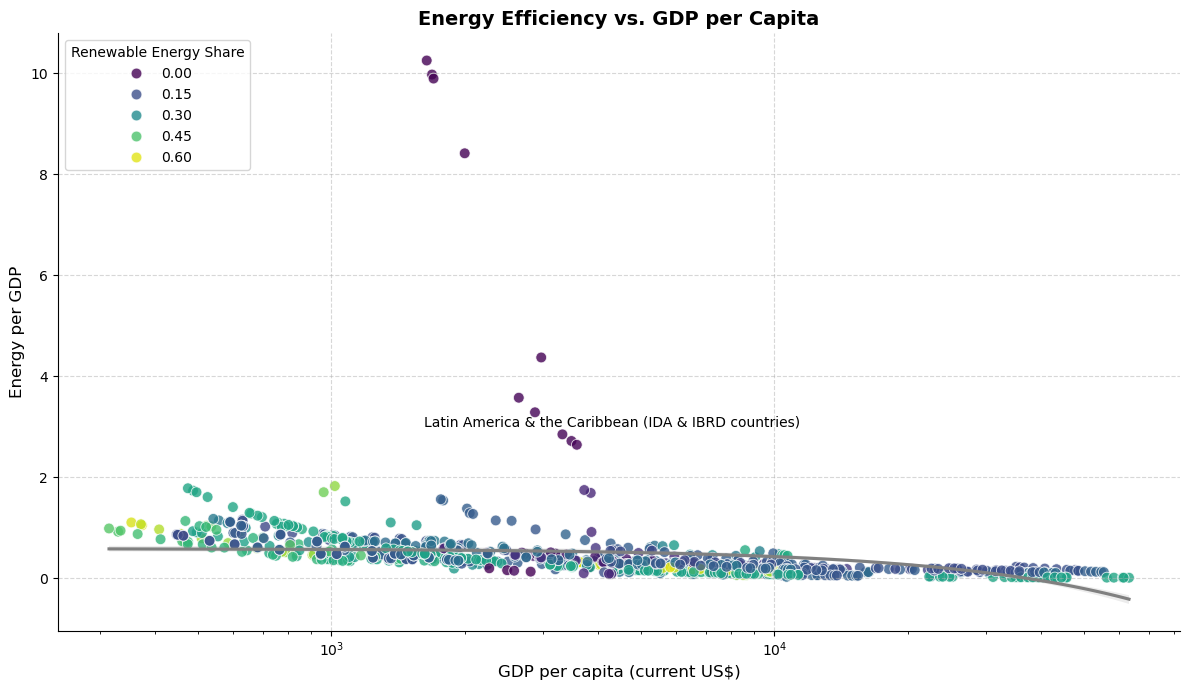

In [31]:
plt.figure(figsize=(12, 7))  # Slightly larger figure size

ax = sns.scatterplot(data=df, x="GDP per capita (current US$)", y="Energy per GDP", hue="Renewable Energy Share", alpha=0.8, s=60, palette="viridis")  # Increased marker size, nicer palette

plt.xscale("log")  # Log scale for GDP
plt.xlabel("GDP per Capita (current US$, log scale)", fontsize=12)  # More descriptive label, larger font
plt.ylabel("Energy Consumption per GDP", fontsize=12)  # Larger font
plt.title("Energy Efficiency vs. GDP per Capita", fontsize=14, fontweight="bold")  # Larger, bolder title

# Customize the legend
plt.legend(title="Renewable Energy Share", fontsize=10, loc="upper left")  # Improved legend title and location

# Add a subtle grid
plt.grid(True, linestyle="--", alpha=0.5)

# Improve plot aesthetics
sns.despine()  # Remove spines
plt.tight_layout()  # Adjust layout

# Optional: Add annotations for interesting points (requires domain knowledge)
# Example: Annotate the point with the highest renewable energy share
highest_renewable = df.loc[df["Renewable Energy Share"].idxmax()]
ax.annotate(highest_renewable["Country"], (highest_renewable["GDP per capita (current US$)"], highest_renewable["Energy per GDP"]), textcoords="offset points", xytext=(0,100), ha='center')

# Optional: Add a regression line (if appropriate)
sns.regplot(x="GDP per capita (current US$)", y="Energy per GDP", data=df, scatter=False, ax=ax, color="gray") #Scatter=False to show line only

plt.show()


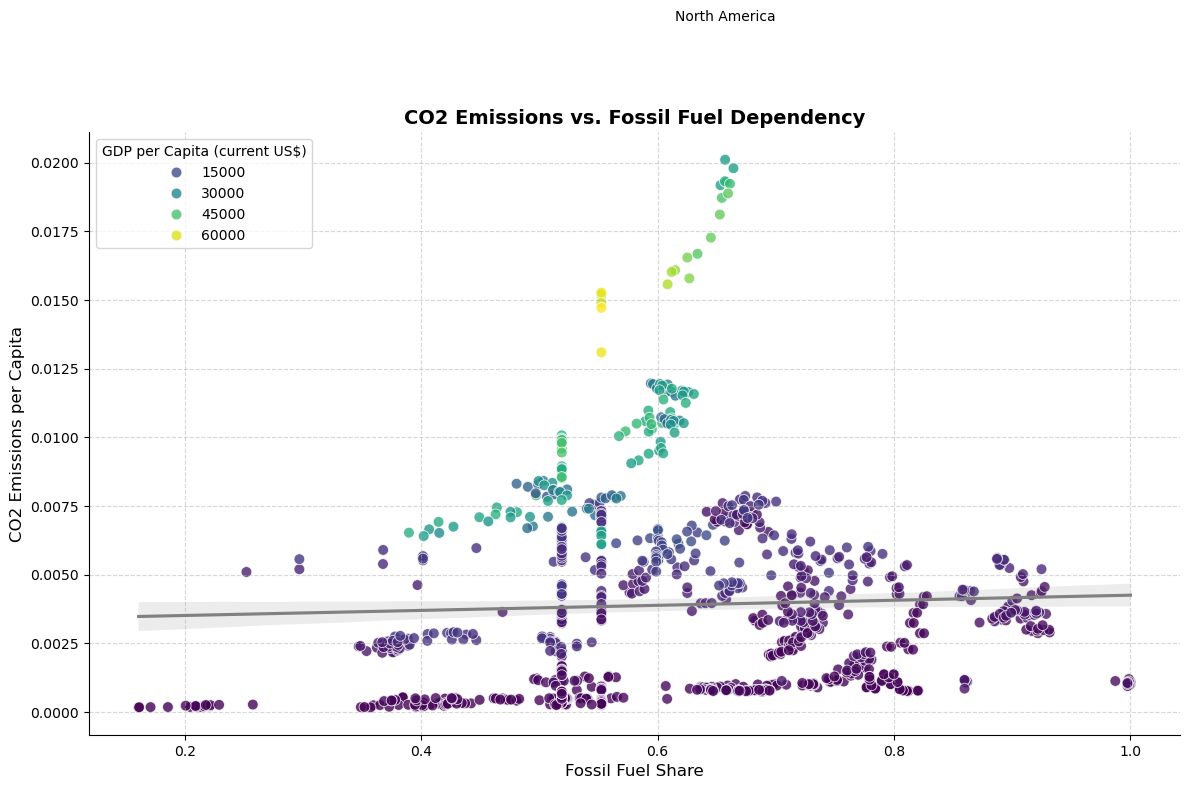

In [42]:
plt.figure(figsize=(12, 7))  # Slightly larger figure size

ax = sns.scatterplot(data=df, x="Fossil Fuel Share", y="CO2 Emissions per Capita", hue="GDP per capita (current US$)", alpha=0.8, s=60, palette="viridis")  # Increased marker size, reversed magma palette (adjust as needed)

plt.xlabel("Fossil Fuel Share (%)", fontsize=12)  # Larger font
plt.ylabel("CO2 Emissions per Capita", fontsize=12)  # Larger font
plt.title("CO2 Emissions vs. Fossil Fuel Dependency", fontsize=14, fontweight="bold")  # Larger, bolder title

# Customize the legend
plt.legend(title="GDP per Capita (current US$)", fontsize=10, loc="upper left")  # Improved legend title and location

# Add a subtle grid
plt.grid(True, linestyle="--", alpha=0.5)

# Improve plot aesthetics
sns.despine()  # Remove spines
plt.tight_layout()  # Adjust layout

# Optional: Add annotations for interesting points (requires domain knowledge)
# Example: Annotate the point with the highest CO2 emissions
highest_co2 = df.loc[df["CO2 Emissions per Capita"].idxmax()]
ax.annotate(highest_co2["Country"], (highest_co2["Fossil Fuel Share"], highest_co2["CO2 Emissions per Capita"]), textcoords="offset points", xytext=(0,100), ha='center')

# Optional: Add a regression line (if appropriate)
sns.regplot(x="Fossil Fuel Share", y="CO2 Emissions per Capita", data=df, scatter=False, ax=ax, color="gray") #Scatter=False to show line only

plt.show()

In [44]:
# Handle missing values (optional: impute with median)
df.fillna(df.drop(columns=["Country"]).median(), inplace=True)

# Feature Engineering: Fossil Fuel Dependency Index
df["CO2 Emissions per Capita"] = df["CO2 emissions (kt)"] / df["Population, total"]
df["Fossil Fuel Index"] = (
    0.5 * df["Fossil fuel energy consumption (% of total)"] +
    0.3 * df["Electricity production from oil, gas and coal sources (% of total)"] +
    0.2 * df["CO2 Emissions per Capita"]
)

# Interaction Terms
df["Econ Growth * Renewable Energy"] = df["GDP growth (annual %)"] * df["Renewable energy consumption (% of total final energy consumption)"]
df["Urbanization * Energy Efficiency"] = df["Urban population growth (annual %)"] * (df["Energy use (kg of oil equivalent per capita)"] / df["GDP per capita (current US$)"])
df["Industry * CO2"] = df["Industry (including construction), value added (current US$)"] * df["CO2 Emissions per Capita"]

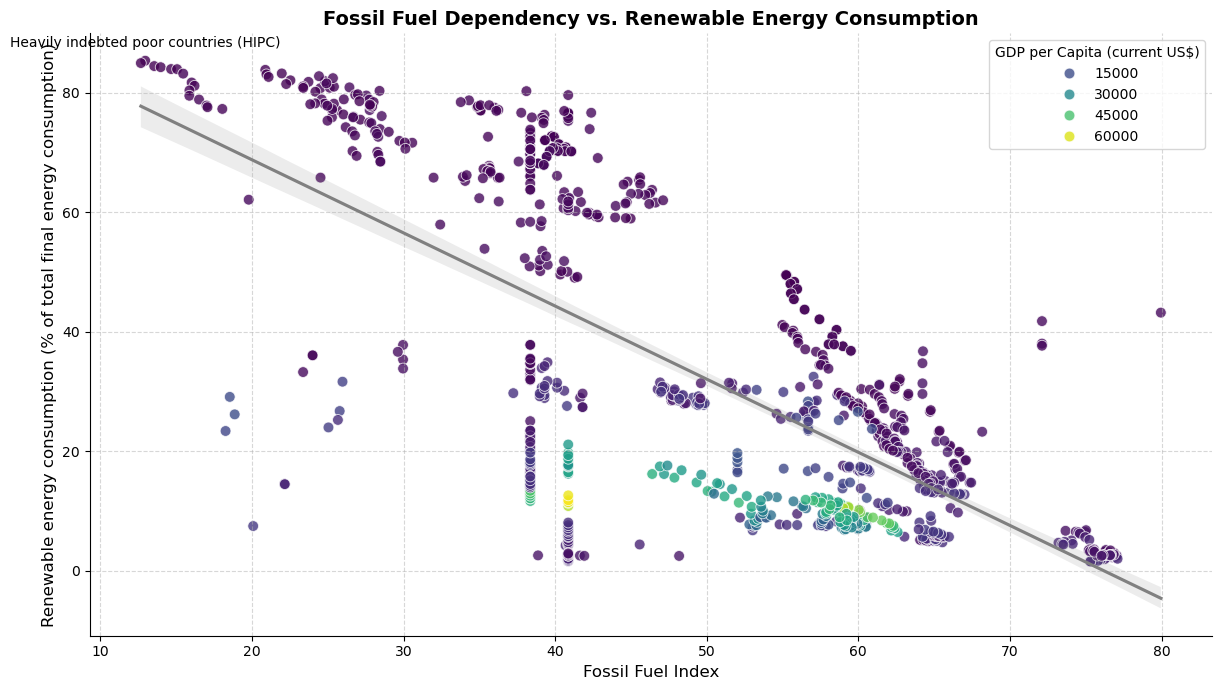

In [45]:
plt.figure(figsize=(12, 7))  # Adjust figure size

ax = sns.scatterplot(data=df, x="Fossil Fuel Index", y="Renewable energy consumption (% of total final energy consumption)", hue="GDP per capita (current US$)", alpha=0.8, s=60, palette="viridis")  # Increased marker size, reversed cividis palette

plt.xlabel("Fossil Fuel Dependency Index", fontsize=12)  # Larger font size
plt.ylabel("Renewable Energy Consumption (% of total final energy consumption)", fontsize=12)  # Larger font size
plt.title("Fossil Fuel Dependency vs. Renewable Energy Consumption", fontsize=14, fontweight="bold")  # Larger, bolder title

# Customize the legend
plt.legend(title="GDP per Capita (current US$)", fontsize=10, loc="upper right")  # Improved legend title and location

# Add a subtle grid
plt.grid(True, linestyle="--", alpha=0.5)

# Improve plot aesthetics
sns.despine()  # Remove spines
plt.tight_layout()  # Adjust layout

# Optional: Add annotations for interesting points (requires domain knowledge)
# Example: Annotate point with highest renewable energy consumption
highest_renewable = df.loc[df["Renewable energy consumption (% of total final energy consumption)"].idxmax()]
ax.annotate(highest_renewable["Country"], (highest_renewable["Fossil Fuel Index"], highest_renewable["Renewable energy consumption (% of total final energy consumption)"]), textcoords="offset points", xytext=(0,10), ha='center')

# Optional: Add a regression line (if appropriate)
sns.regplot(x="Fossil Fuel Index", y="Renewable energy consumption (% of total final energy consumption)", data=df, scatter=False, ax=ax, color="gray") #Scatter=False to show line only


plt.show()

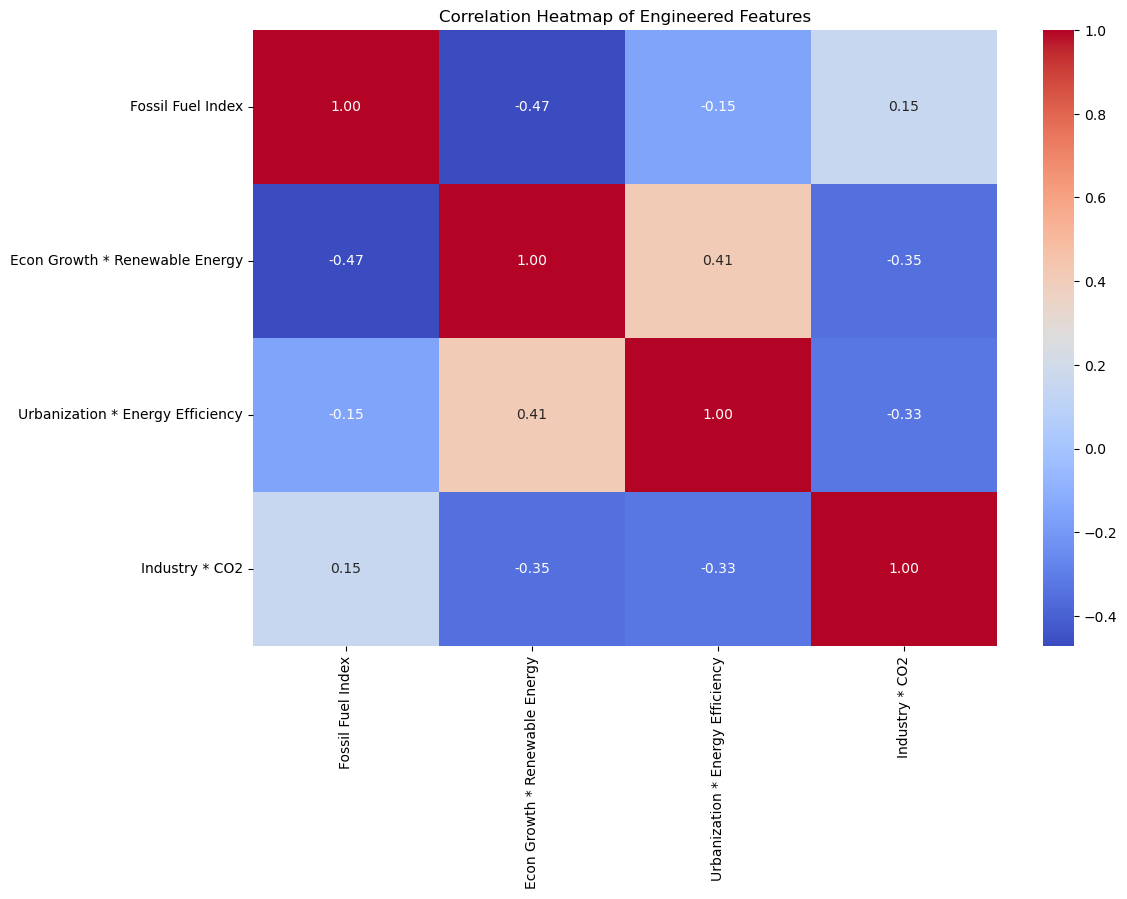

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[["Fossil Fuel Index", "Econ Growth * Renewable Energy", "Urbanization * Energy Efficiency", "Industry * CO2"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Engineered Features")
plt.show()

This visualization examines the relationship between the combined effect of economic growth and renewable energy consumption on CO2 emissions per capita. The plot shows a scatter plot of the data points along with a regression line representing the general trend. The correlation between the combined variable and CO2 emissions per capita is -0.55. This suggests a moderate relationship between the two variables.The negative correlation suggests that as the product of economic growth and renewable energy consumption increases, CO2 emissions per capita tend to decrease. This could indicate that renewable energy growth is having a positive impact in offsetting emissions even as the economy grows.Further investigation is needed to explore the complex interplay between economic growth, renewable energy, and CO2 emissions, and to identify potential non-linear relationships or confounding variables.


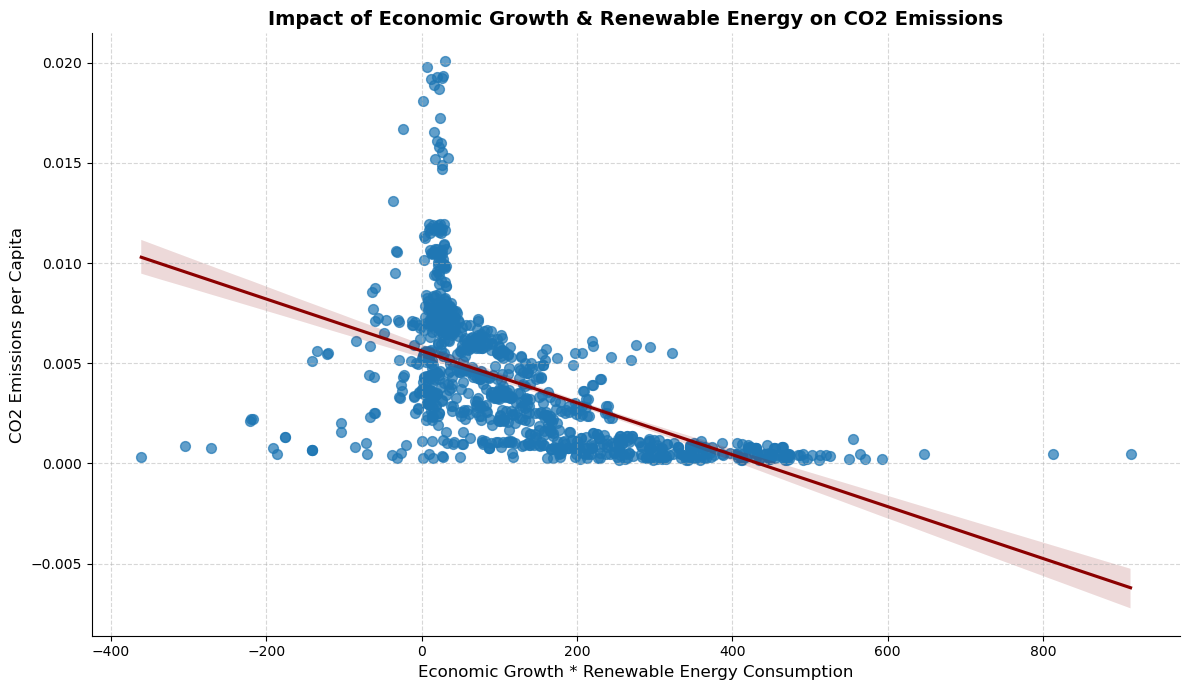

In [48]:
plt.figure(figsize=(12, 7))  # Slightly larger figure size

ax = sns.regplot(data=df, x="Econ Growth * Renewable Energy", y="CO2 Emissions per Capita", scatter_kws={"alpha":0.7, "s":50}, line_kws={"color": "darkred"})  # Increased marker size, adjusted alpha, line color

plt.xlabel("Economic Growth * Renewable Energy Consumption", fontsize=12)  # Larger font
plt.ylabel("CO2 Emissions per Capita", fontsize=12)  # Larger font
plt.title("Impact of Economic Growth & Renewable Energy on CO2 Emissions", fontsize=14, fontweight="bold")  # Larger, bolder title

# Add a subtle grid
plt.grid(True, linestyle="--", alpha=0.5)

# Improve plot aesthetics
sns.despine()  # Remove spines
plt.tight_layout()  # Adjust layout


# Dynamic Paragraph Generation:
correlation = df["Econ Growth * Renewable Energy"].corr(df["CO2 Emissions per Capita"])

paragraph = f"This visualization examines the relationship between the combined effect of economic growth and renewable energy consumption on CO2 emissions per capita. The plot shows a scatter plot of the data points along with a regression line representing the general trend. The correlation between the combined variable and CO2 emissions per capita is {correlation:.2f}. "

if abs(correlation) > 0.7:  # Example threshold - adjust as needed
    paragraph += "This suggests a strong relationship between the two variables."
elif abs(correlation) > 0.5:
    paragraph += "This suggests a moderate relationship between the two variables."
else:
    paragraph += "This suggests a weak or no clear linear relationship between the two variables."

# Add more in-depth analysis (requires your domain knowledge)
# Example:
if correlation > 0:
    paragraph += "The positive correlation suggests that as the product of economic growth and renewable energy consumption increases, CO2 emissions per capita tend to increase as well. This might seem counterintuitive, but it could indicate that while renewable energy is growing, it's not yet offsetting the emissions associated with economic growth."
elif correlation < 0:
    paragraph += "The negative correlation suggests that as the product of economic growth and renewable energy consumption increases, CO2 emissions per capita tend to decrease. This could indicate that renewable energy growth is having a positive impact in offsetting emissions even as the economy grows."
else:
    paragraph += "The lack of correlation suggests that the combined effect of economic growth and renewable energy consumption does not have a clear linear relationship with CO2 emissions per capita. Other factors may be playing a more significant role."

paragraph += "Further investigation is needed to explore the complex interplay between economic growth, renewable energy, and CO2 emissions, and to identify potential non-linear relationships or confounding variables."

print(paragraph)

plt.show()